In [1]:
# The modules we're going to use
from __future__ import print_function

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.callbacks import TensorBoard

import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

Using TensorFlow backend.


X_train size:  (60000, 28, 28)
y_train size:  (60000,)
X_test size:  (10000, 28, 28)
y_test size:  (10000,)
The training example 5's target is 2
After pre-processing, X_train size:  (60000, 784)
After pre-processing, y_train size:  (60000, 10)
After pre-processing, X_test size:  (10000, 784)
After pre-processing, y_test size:  (10000, 10)
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


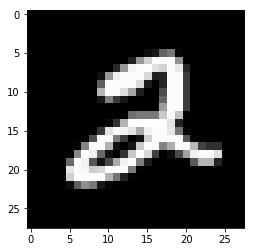

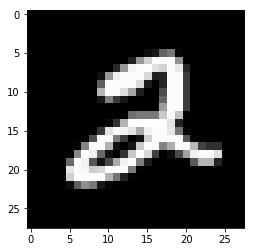

In [2]:
# Load mnist data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# Display size
print('X_train size: ', X_train.shape)
print('y_train size: ', y_train.shape)
print('X_test size: ', X_test.shape)
print('y_test size: ', y_test.shape)

# Show one training example
idx = 5
plt.imshow(X_train[idx], cmap='gray')
print('The training example %d\'s target is %d' % (idx, y_train[idx]))

# Pre-processing
X_train = X_train.reshape(X_train.shape[0],-1)/255
X_test = X_test.reshape(X_test.shape[0],-1)/255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print('After pre-processing, X_train size: ', X_train.shape)
print('After pre-processing, y_train size: ', y_train.shape)
print('After pre-processing, X_test size: ', X_test.shape)
print('After pre-processing, y_test size: ', y_test.shape)

# Show one training example
idx = 5
plt.figure()
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
print(y_train[idx])

In [3]:
# Create a neural net
model = Sequential([
    Dense(input_dim=784, units=32),
    Activation('relu'),
    Dense(units=10),
    Activation('softmax')
])

# Specify an optimizer to use
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

# Choose loss function, optimization method, and metrics (which results to display)
model.compile(
    optimizer = adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use TensorBoard, an interactive visualization tool, to show the loss and accuracy at each epoch
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Training
model.fit(X_train,y_train,batch_size = 32, epochs=10, verbose=2, callbacks=[tbCallBack])

# Testing
loss, accuracy = model.evaluate(X_test,y_test,verbose=2)
print('The loss on testing data', loss)
print('The accuracy on testing data', accuracy)

Epoch 1/10
2s - loss: 0.3505 - acc: 0.9006
Epoch 2/10
2s - loss: 0.1908 - acc: 0.9450
Epoch 3/10
2s - loss: 0.1511 - acc: 0.9563
Epoch 4/10
2s - loss: 0.1251 - acc: 0.9633
Epoch 5/10
2s - loss: 0.1084 - acc: 0.9679
Epoch 6/10
2s - loss: 0.0969 - acc: 0.9708
Epoch 7/10
2s - loss: 0.0881 - acc: 0.9744
Epoch 8/10
2s - loss: 0.0814 - acc: 0.9754
Epoch 9/10
2s - loss: 0.0747 - acc: 0.9771
Epoch 10/10
2s - loss: 0.0695 - acc: 0.9792
The loss on testing data 0.111002527683
The accuracy on testing data 0.9687
